In [113]:
# Data https://www.kaggle.com/datasets/shenba/time-series-datasets?select=Electric_Production.csv

import pandas as pd
from scipy.stats import boxcox 

electric_data = pd.read_csv('Electric_Production.csv')
electric_data

# check if there is any missing data
print('The null value in the missing data are',electric_data.isnull().sum())

The null value in the missing data are DATE          0
IPG2211A2N    0
dtype: int64


In [114]:
electric_data['DATE'] = pd.to_datetime(electric_data['DATE'])
electric_data.set_index('DATE', inplace=True)


In [115]:
electric_data

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [116]:
#spit for the train and test data
train_data = electric_data.iloc[:len(electric_data)-24]
test_data = electric_data.iloc[len(electric_data)-24:]
print(train_data.shape, test_data.shape)

(373, 1) (24, 1)


In [117]:
train_data

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2015-09-01,101.9204
2015-10-01,91.5959
2015-11-01,93.0628


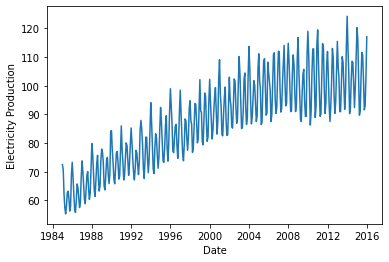

In [118]:
import matplotlib.pyplot as plt
plt.plot(train_data['IPG2211A2N'])
plt.xlabel('Date')
plt.ylabel('Electricity Production')
plt.show()


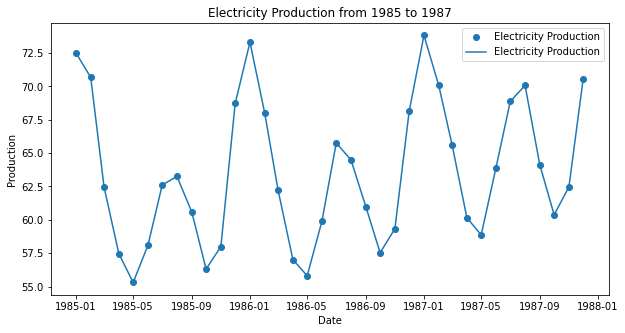

In [161]:
# see the data from first three years for the pattern
import matplotlib.pyplot as plt

data_first_three_years = train_data[:36]

# Plot the data for the first three years
plt.figure(figsize=(10, 5))  # Set the figure size as desired
#make everypoint in the plot more visible
plt.scatter(data_first_three_years.index, data_first_three_years['IPG2211A2N'], label='Electricity Production')
plt.plot(data_first_three_years.index, data_first_three_years['IPG2211A2N'], label='Electricity Production')
plt.title('Electricity Production from 1985 to 1987')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()

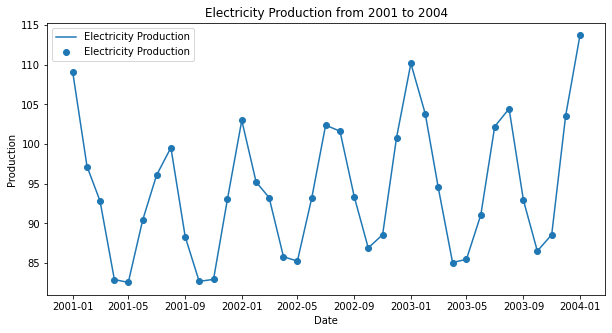

In [163]:
# pattern for the middle three years in in the train data

data_middle_three_years = train_data[192:192+37]

plt.figure(figsize=(10, 5))  # Set the figure size as desired
plt.plot(data_middle_three_years.index, data_middle_three_years['IPG2211A2N'], label='Electricity Production')
plt.scatter(data_middle_three_years.index, data_middle_three_years['IPG2211A2N'], label='Electricity Production')
plt.title('Electricity Production from 2001 to 2004')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()
# The season is not fix, so ingore the seasonality


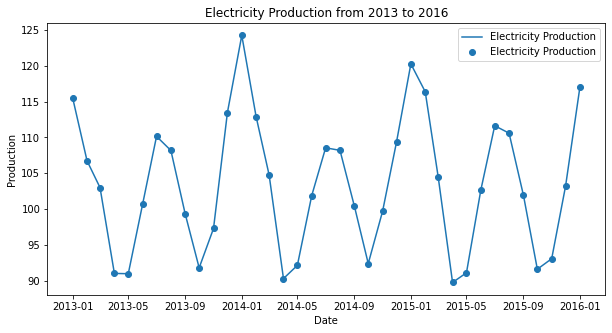

In [164]:
# pattern of the last three years in the train data
data_last_three_years = train_data[len(train_data)-37:]
plt.figure(figsize=(10, 5))  # Set the figure size as desired
plt.plot(data_last_three_years.index, data_last_three_years['IPG2211A2N'], label='Electricity Production')
plt.scatter(data_last_three_years.index, data_last_three_years['IPG2211A2N'], label='Electricity Production')
plt.title('Electricity Production from 2013 to 2016')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()

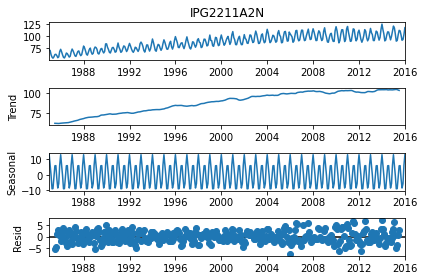

In [165]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_data['IPG2211A2N'], model='additive')
result.plot()
plt.show()

There is a significant seasonal tread by plot the first three years of the data.

In [166]:
## Stationarity Test using ADF Test

from statsmodels.tsa.stattools import adfuller


# Make sure the 'DATE' column is in datetime format


# Apply the ADF test on the time series
result = adfuller(train_data['IPG2211A2N'])

# Output the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.437851
p-value: 0.131337
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [187]:
train_data['IPG2211A2N']

DATE
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
                ...   
2015-09-01    101.9204
2015-10-01     91.5959
2015-11-01     93.0628
2015-12-01    103.2203
2016-01-01    117.0837
Name: IPG2211A2N, Length: 373, dtype: float64

# Select model manually

In [167]:
# take the log transformation to constance the variance
import numpy as np

train_data['IPG2211A2N_log'] = np.log(train_data['IPG2211A2N'])

/var/folders/_h/n4z6x9sx4s18b6l_lb44jpzc0000gn/T/ipykernel_1029/57459404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['IPG2211A2N_log'] = np.log(train_data['IPG2211A2N'])


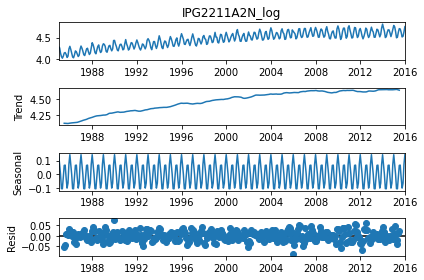

In [192]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_data['IPG2211A2N_log'], model='additive')
result.plot()
plt.show()

In [168]:
# adf test after log

result = adfuller(train_data['IPG2211A2N_log'])

# Output the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.254230
p-value: 0.017053
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [169]:

#differenceing the data
train_data_ts_diff = train_data['IPG2211A2N_log'].diff().diff(periods=12)
train_data_ts_diff.isnull().sum()
# print the null values location
train_data_ts_diff[train_data_ts_diff.isnull()]
#drop the null values, need more explaination for how to handle the null values
train_data_ts_diff.dropna(inplace=True)

In [170]:

result_diff = adfuller(train_data_ts_diff)

# Output the results
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -7.751882
p-value: 0.000000
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


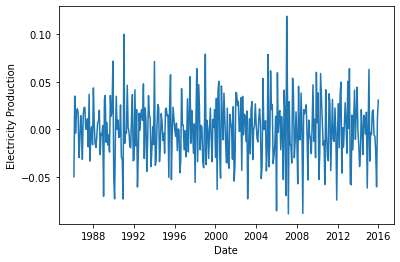

In [171]:
# plot the differenced data
plt.plot(train_data_ts_diff)
plt.xlabel('Date')
plt.ylabel('Electricity Production')
plt.show()

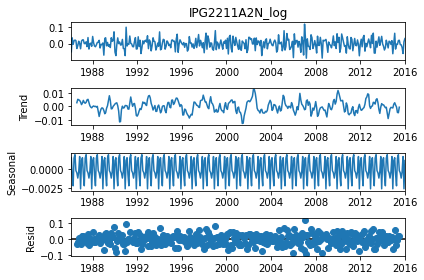

In [172]:



train_data_ts_diff.index = pd.DatetimeIndex(train_data_ts_diff.index.values,
                                           freq=train_data_ts_diff.index.inferred_freq)

# Perform seasonal decomposition
decomposition = seasonal_decompose(train_data_ts_diff, model='additive')

# Plot the seasonal decomposition
fig = decomposition.plot()
plt.show()


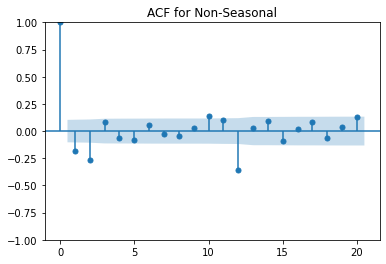

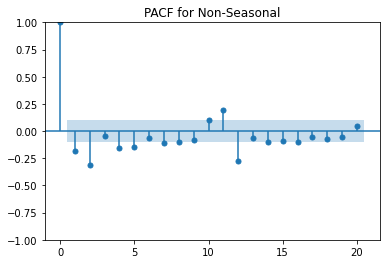

In [84]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming 'train_data_ts_diff' is your preprocessed time series data after removing trend and seasonality

# Plot ACF and PACF for non-seasonal components
plot_acf(train_data_ts_diff, lags=20, title='ACF for Non-Seasonal')
plot_pacf(train_data_ts_diff, lags=20, title='PACF for Non-Seasonal', method='ywm')
plt.show()
# (2,1,0) for the non seasonal component

In [173]:
train_data

,IPG2211A2N,IPG2211A2N_log
DATE,,
1985-01-01,72.5052,4.283658
1985-02-01,70.6720,4.258049
1985-03-01,62.4502,4.134369
1985-04-01,57.4714,4.051287
1985-05-01,55.3151,4.013046
...,...,...
2015-09-01,101.9204,4.624192
2015-10-01,91.5959,4.517387
2015-11-01,93.0628,4.533275


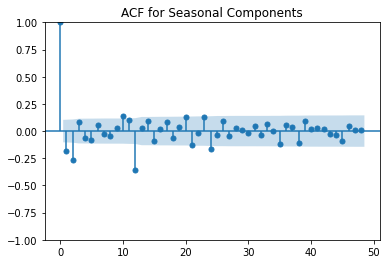

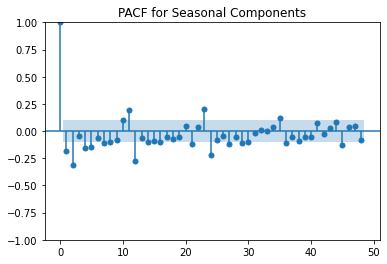

In [91]:
# Plot ACF and PACF for seasonal components
plot_acf(train_data_ts_diff, lags=48, title='ACF for Seasonal Components')

plot_pacf(train_data_ts_diff, lags=48, title='PACF for Seasonal Components', method='ywm')
plt.show()
# (0,1,1) for the seasonal component

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.14467D+00    |proj g|=  9.31087D+00

At iterate    5    f= -2.16992D+00    |proj g|=  5.87006D-02

At iterate   10    f= -2.17056D+00    |proj g|=  1.79111D+00

At iterate   15    f= -2.17644D+00    |proj g|=  1.69631D-01

At iterate   20    f= -2.17674D+00    |proj g|=  4.41699D-01

At iterate   25    f= -2.18070D+00    |proj g|=  8.98468D-01

At iterate   30    f= -2.18209D+00    |proj g|=  2.21055D-01

At iterate   35    f= -2.18247D+00    |proj g|=  2.93486D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

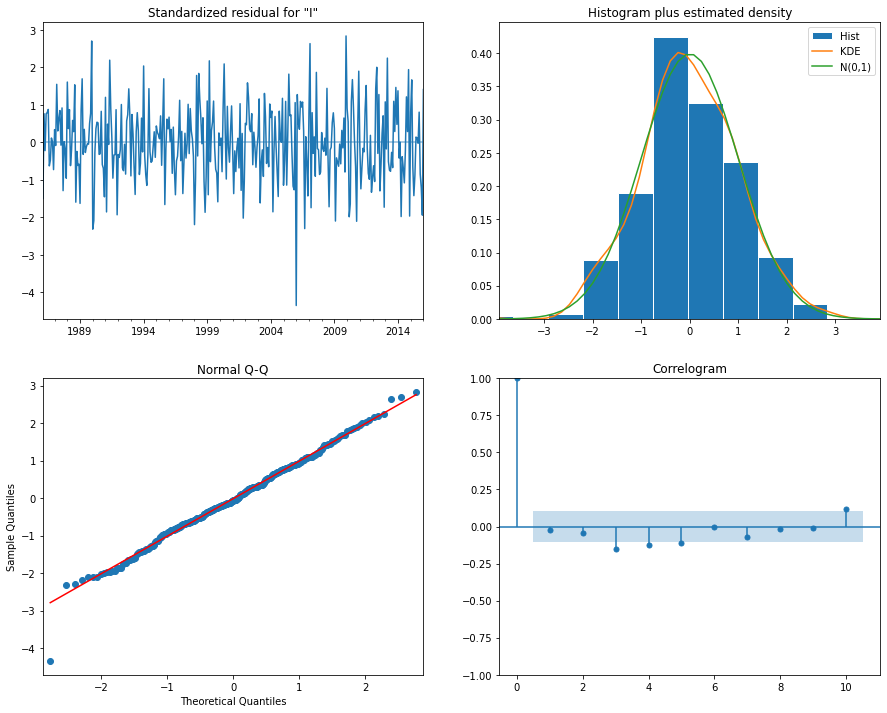

In [208]:
# model SARIMA(2,1,0)(0,1,1)12

from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm


import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'train_data' is a pandas DataFrame and 'IPG2211A2N' is the time series column
# Also assuming that 'train_data' has a DateTime index with a proper frequency set
# If the frequency is not set, you need to set it according to the data's periodicity
# Example: train_data.index.freq = 'M' if the data is monthly

# Fit an ARIMA(2,1,0)(0,1,1)12 model
model1 = SARIMAX(train_data['IPG2211A2N_log'], order=(2, 1, 0), seasonal_order=(0, 1, 1, 12))
results = model1.fit()

# Display the summary of the model's results
print(results.summary())

# Optionally, plot the diagnostics to assess the fit
results.plot_diagnostics(figsize=(15, 12))
plt.show()





In [209]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                       IPG2211A2N_log   No. Observations:                  373
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 814.061
Date:                              Sat, 27 Apr 2024   AIC                          -1620.123
Time:                                      19:33:58   BIC                          -1604.578
Sample:                                  01-01-1985   HQIC                         -1613.942
                                       - 01-01-2016                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2553      0.050     -5.099      0.000      -0.353      -0.157
ar.L2         -0.23

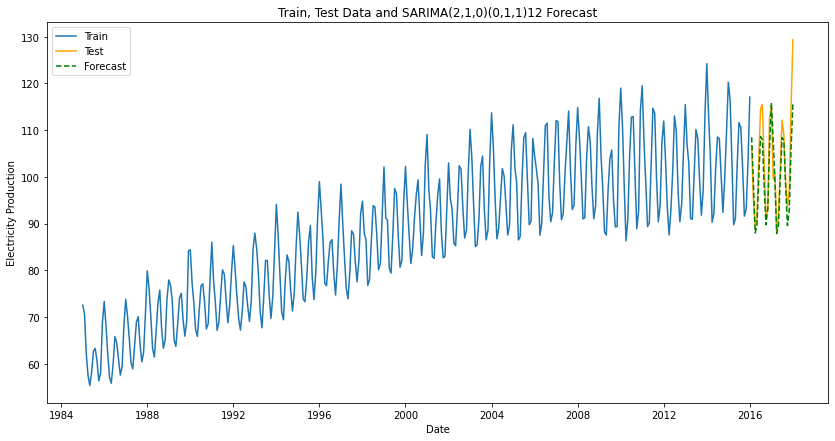

RMSE: 4.993811781426084
MAE: 3.840437846989595
MAPE: 0.03570693644692922


In [210]:
# predict the future values

from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

# Assuming 'results' is the output from your fitted SARIMAX model on the log-transformed data

# Forecast future values
forecast_results = results.get_forecast(steps=24)  # Replace 24 with the number of steps you want to forecast

# Get the forecasted values
forecasted_values = forecast_results.predicted_mean

# Back-transform the forecasted values by taking the exponential
original_scale_forecast = np.exp(forecasted_values)

# Get the confidence intervals for the forecasts
conf_int = forecast_results.conf_int()

# Back-transform the confidence intervals
original_scale_conf_int = np.exp(conf_int)


plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['IPG2211A2N'], label='Train')
plt.plot(test_data.index, test_data['IPG2211A2N'], label='Test', color='orange')
plt.plot(test_data.index, original_scale_forecast, label='Forecast', color='green', linestyle='--')
plt.title('Train, Test Data and SARIMA(2,1,0)(0,1,1)12 Forecast')
plt.xlabel('Date')
plt.ylabel('Electricity Production')
plt.legend()
plt.show()


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, original_scale_forecast))

# Calculate MAE
mae = mean_absolute_error(test_data, original_scale_forecast)

# Calculate MAPE
mape = mean_absolute_percentage_error(test_data, original_scale_forecast)

# Print the metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")


# Select model by auto_arima

In [176]:
import pmdarima as pm
results=pm.auto_arima(train_data['IPG2211A2N_log'], d=1, start_p=0, start_q=0, max_p=3, max_q=3,
                    seasonal=True, m=12, D=1, 
                    start_P=0, start_Q=0, 
                    max_P=2, max_Q=2, 
                    information_criterion='aic', 
                    trace=True, error_action='ignore', stepwise=True)
results.summary()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-1451.140, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1514.672, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-1615.888, Time=1.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-1479.254, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-1616.663, Time=1.39 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-1530.770, Time=0.25 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-1620.574, Time=3.91 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-1573.694, Time=0.89 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=-1618.995, Time=6.87 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-1617.278, Time=7.08 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=-1592.654, Time=2.17 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=-1655.007, Time=5.56 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=2.35 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-1622.872, Time=2.81 sec
 ARIMA(1,1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  373
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                 834.690
Date:                                 Sat, 27 Apr 2024   AIC                          -1657.379
Time:                                         16:28:37   BIC                          -1634.062
Sample:                                     01-01-1985   HQIC                         -1648.108
                                          - 01-01-2016                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5338      0.062      8.622      0.000       0.412       0.655
ma.L1         -0.9314      0.027    -34.121      0.000      -0.985      -0.878
ar.S.L12      -0.3962      0.383     -1.035      0.301      -1.147       0.354
ma.S.L12      -0.3016      0.373     -0.808      0.419      -1.033       0.430
ma.S.L24      -0.4330      0.282     -1.534      0.125      -0.986       0.120
sigma2         0.0005    3.7e-05     14.717      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.86
Prob(Q):                              0.82   Prob(JB):                         0.09
Heteroskedasticity (H):               1.36   Skew:                            -0.14
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.14845D+00    |proj g|=  1.18046D+01

At iterate    5    f= -2.19573D+00    |proj g|=  5.30831D-01

At iterate   10    f= -2.20354D+00    |proj g|=  2.61562D+00

At iterate   15    f= -2.20458D+00    |proj g|=  1.09439D-01

At iterate   20    f= -2.20636D+00    |proj g|=  2.12940D+00

At iterate   25    f= -2.22523D+00    |proj g|=  3.11783D+00

At iterate   30    f= -2.23628D+00    |proj g|=  1.17316D+00

At iterate   35    f= -2.23661D+00    |proj g|=  9.10315D-02

At iterate   40    f= -2.23771D+00    |proj g|=  4.24332D-02

At iterate   45    f= -2.23776D+00    |proj g|=  6.40726D-02

At iterate   50    f= -2.23777D+00    |proj g|=  2.81923D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                          IPG2211A2N_log   No. Observations:                  373
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                 834.690
Date:                                 Sat, 27 Apr 2024   AIC                          -1657.379
Time:                                         16:32:43   BIC                          -1634.062
Sample:                                     01-01-1985   HQIC                         -1648.108
                                          - 01-01-2016                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5338      0.062      8.622      0.000       0.412       0

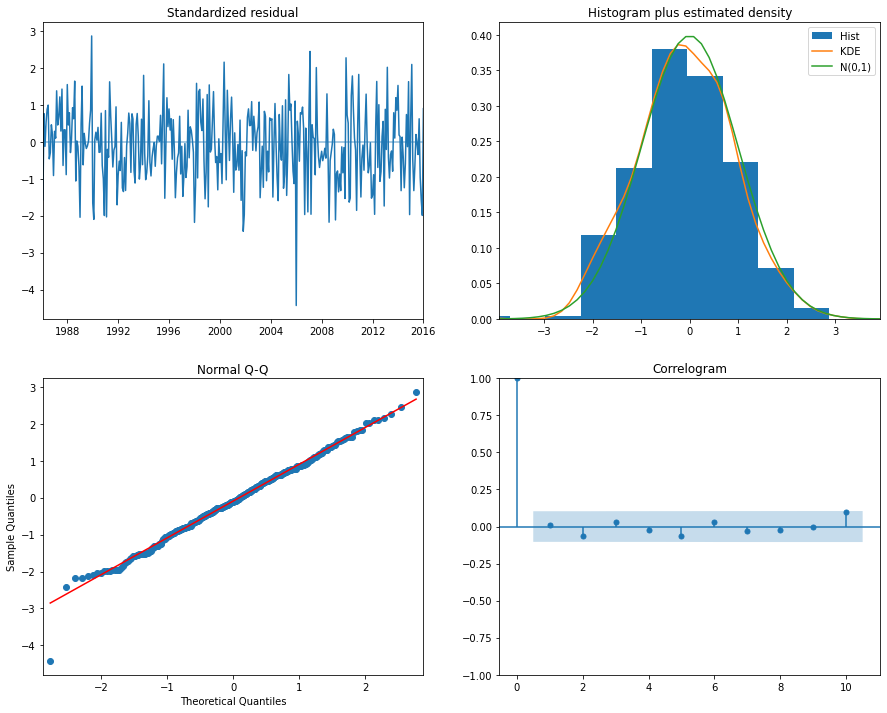

In [179]:



# model SARIMA(1,1,1)(1,1,2)12

model2 = SARIMAX(train_data['IPG2211A2N_log'], order=(1, 1, 1), seasonal_order=(1, 1, 2, 12))
results2 = model2.fit()

# Display the summary of the model's results
print(results2.summary())

# Optionally, plot the diagnostics to assess the fit
results.plot_diagnostics(figsize=(15, 12))
plt.show()





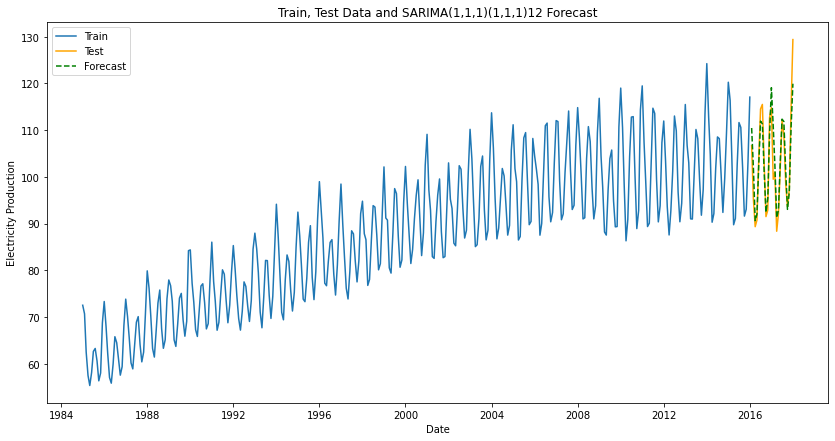

RMSE: 4.0783675012322975
MAE: 3.041569336864115
MAPE: 0.028882859899073226


In [212]:
forecast_results2 = results2.get_forecast(steps=24)  # Replace 24 with the number of steps you want to forecast

# Get the forecasted values
forecasted_values2 = forecast_results2.predicted_mean

# Back-transform the forecasted values by taking the exponential
original_scale_forecast2 = np.exp(forecasted_values2)

# Get the confidence intervals for the forecasts
conf_int2 = forecast_results2.conf_int()

# Back-transform the confidence intervals
original_scale_conf_int2 = np.exp(conf_int2)


plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['IPG2211A2N'], label='Train')
plt.plot(test_data.index, test_data['IPG2211A2N'], label='Test', color='orange')
plt.plot(test_data.index, original_scale_forecast2, label='Forecast', color='green', linestyle='--')
plt.title('Train, Test Data and SARIMA(1,1,1)(1,1,1)12 Forecast')
plt.xlabel('Date')
plt.ylabel('Electricity Production')
plt.legend()
plt.show()

# Calculate RMSE
rmse2 = np.sqrt(mean_squared_error(test_data, original_scale_forecast2))

# Calculate MAE
mae2 = mean_absolute_error(test_data, original_scale_forecast2)

# Calculate MAPE
mape2 = mean_absolute_percentage_error(test_data, original_scale_forecast2)

# Print the metrics
print(f"RMSE: {rmse2}")
print(f"MAE: {mae2}")
print(f"MAPE: {mape2}")

## model choice 

## Holt-Winter

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


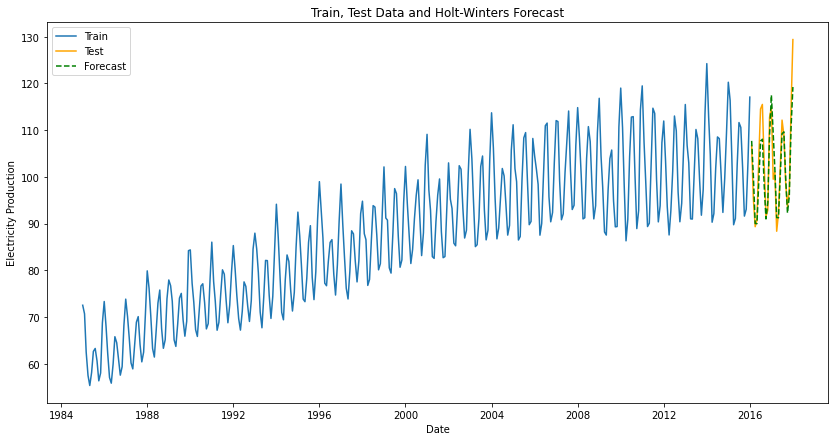

RMSE: 4.294673367458374
MAE: 3.2330530873606946
MAPE: 0.0302204543563785


In [206]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model
hw_model = ExponentialSmoothing(train_data['IPG2211A2N_log'], seasonal='mul', trend='mul', seasonal_periods=12).fit()

# Forecast the next 24 months (or however many periods you have in your test set)
forecast = np.exp(hw_model.forecast(steps=len(test_data)))

# If you used log-transformed data, back-transform the forecasts
# forecast_original_scale = np.exp(forecast)

# Plot training, test, and forecast
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['IPG2211A2N'], label='Train')
plt.plot(test_data.index, test_data['IPG2211A2N'], label='Test', color='orange')
plt.plot(test_data.index, forecast, label='Forecast', color='green', linestyle='--')
# Add the confidence interval shading

plt.title('Train, Test Data and Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Electricity Production')
plt.legend()
plt.show()

rmse3= np.sqrt(mean_squared_error(test_data['IPG2211A2N'], forecast))
mae3 = mean_absolute_error(test_data['IPG2211A2N'], forecast)
mape3 = mean_absolute_percentage_error(test_data['IPG2211A2N'], forecast)

print(f"RMSE: {rmse3}")
print(f"MAE: {mae3}")
print(f"MAPE: {mape3}")






